#Evaluation Metrics and Regression Implementation:



#Assignment Questions:-

Q1. What does R-squared represent in a regression model?

.In a regression model, R-squared represents the proportion of the variance in the dependent variable (the outcome) that is explained by the independent variables (the predictors).

Q2.What are the assumptions of linear regression?

.Linear regression relies on several key assumptions for its validity and reliability. These include: linearity, independence, homoscedasticity, normality, and no multicollinearity. Violating these assumptions can lead to inaccurate predictions and biased model results.

Q3.What is the difference between R-squared and Adjusted R-squared?

.R-squared measures the proportion of variance in the dependent variable that is explained by the independent variables in a regression model. Adjusted R-squared, on the other hand, is a modified version of R-squared that takes into account the number of predictor variables in the model. It penalizes the addition of unnecessary variables, potentially preventing overfitting.

Q4., Why do we use Mean Squared Error (MSE)?

.Mean Squared Error (MSE) is used to measure the accuracy of a model's predictions by calculating the average of the squared differences between the actual and predicted values. It's a commonly used metric in statistics and machine learning for evaluating the performance of regression models and for optimizing model parameters.

Q5.What does an Adjusted R-squared value of 0.85 indicate?

.An adjusted R-squared value of 0.85 indicates that the model explains 85% of the variance in the dependent variable, while also accounting for the number of predictor variables in the model.

Q6.How do we check for normality of residuals in linear regression?

.To check for the normality of residuals in a linear regression, you can use a combination of graphical and statistical methods. You can visually assess normality using histograms, Q-Q plots, and residual plots, and also employ statistical tests like the Shapiro-Wilk test or Kolmogorov-Smirnov test.

Q7.What is multicollinearity, and how does it impact regression?

.How can we Handle Multicollinearity in Linear Regression ...Multicollinearity in regression analysis refers to a situation where two or more independent variables in a regression model are highly correlated with each other. This high correlation can make it difficult for the model to accurately determine the individual effects of each independent variable on the dependent variable. It can lead to unstable and unreliable coefficient estimates, inflated standard errors, and potentially misleading results.

Q8. What is Mean Absolute Error (MAE)?

.Mean Absolute Error (MAE) is a simple metric used to measure the average magnitude of the differences between predicted and actual values in a regression model. In essence, it calculates the average of the absolute differences between the predicted values and the true values.


Q9.What are the benefits of using an ML pipeline?

.Using a machine learning (ML) pipeline offers several advantages, including increased efficiency, enhanced collaboration, improved reproducibility, and scalability. By automating and streamlining the ML workflow, pipelines reduce the time and effort required to build, train, and maintain models, while also facilitating easier deployment and monitoring.

Q10. Why is RMSE considered more interpretable than MSE?

.RMSE is often preferred over MSE because it's more interpretable. It's on the same scale as the original data, making it easier to understand the magnitude of the error. Additionally, RMSE is more sensitive to outliers than MSE, as it penalizes large errors more heavily.

Q11. What is pickling in Python, and how is it useful in ML?

.Pickling in Python is a process where a Python object is converted into a byte stream for storage or transmission. This serialized data can then be reconstructed to create an identical object. In machine learning, pickling is crucial for saving and loading trained models, allowing them to be reused without retraining.


Q12.What does a high R-squared value mean?

.A high R-squared value indicates that a statistical model effectively explains the variability in the dependent variable. It means that the independent variables included in the model account for a large proportion of the changes observed in the outcome variable.

Q13.What happens if linear regression assumptions are violated?

.Violating the assumptions of linear regression can lead to a variety of issues, including biased estimates, inefficient models, and unreliable predictions. Specifically, violations can affect the accuracy and reliability of confidence intervals and scientific insights derived from the model.

Q15. How can feature selection improve model performance in regression analysis?

.Feature selection improves regression model performance by identifying and using only the most relevant predictors, reducing noise and overfitting, leading to more accurate, interpretable, and efficient models. By focusing on the key variables, feature selection can enhance the model's predictive accuracy and generalizability to unseen data.


Q16. How is Adjusted R-squared calculated?

.Adjusted R-squared is calculated by modifying the standard R-squared value to account for the number of predictor variables in a regression model. It's a more accurate measure of how well the model fits the data, especially when comparing models with different numbers of variables.

Q17. Why is MSE sensitive to outliers?

.MSE is sensitive to outliers because it amplifies the impact of large errors through squaring. This means that even a single outlier with a large error can disproportionately increase the overall MSE value, potentially skewing the model's error estimation.

Q18. What is the role of homoscedasticity in linear regression?

.In linear regression, homoscedasticity refers to the assumption that the variance of the errors (residuals) is constant across all levels of the independent variables. It means that the spread of the data points around the regression line is consistent, not varying with the independent variable values. This assumption is crucial for the validity and efficiency of regression estimates.

Q20.Why is pickling considered risky?

.Pickling (using the pickle module in Python) is considered risky in machine learning because it can allow malicious code execution during the deserialization process, potentially leading to serious security vulnerabilities. Specifically, the GLOBAL and REDUCE opcodes within the "pickle machine" can execute arbitrary code, making it possible for attackers to embed malicious payloads in pickled files that are then executed when the model is loaded.

Q21.What alternatives exist to pickling for saving ML models?

.Joblib is an alternative tool to pickle that we can use to save [and load] our models. It's part of SciPy's ecosystem and is much more efficient on objects that carry large NumPy arrays — learn more about Joblib benefits in this StackOverflow discussion.

Q22. What is heteroscedasticity, and why is it a problem?

.Heteroscedasticity, in statistics, refers to a situation where the variance of the errors (or residuals) in a regression model is not constant across all observations. Essentially, the spread of the data points around the regression line is different for different values of the independent variable. This is a problem because it violates a key assumption of Ordinary Least Squares (OLS) regression, which is that the error terms have a constant variance.


Q23.How can interaction terms enhance a regression model's predictive power?

.Interpreting Interactions in RegressionInteraction terms in regression models enhance predictive power by capturing the combined effect of two or more independent variables on the dependent variable, allowing for more flexible and accurate modeling of complex relationships. This can lead to a better fit to the data and improved predictive performance compared to models that treat variables as independent.


#PRACTICAL QUESTIONS:-

Q1.Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model
using Seaborn's "diamonds" dataset

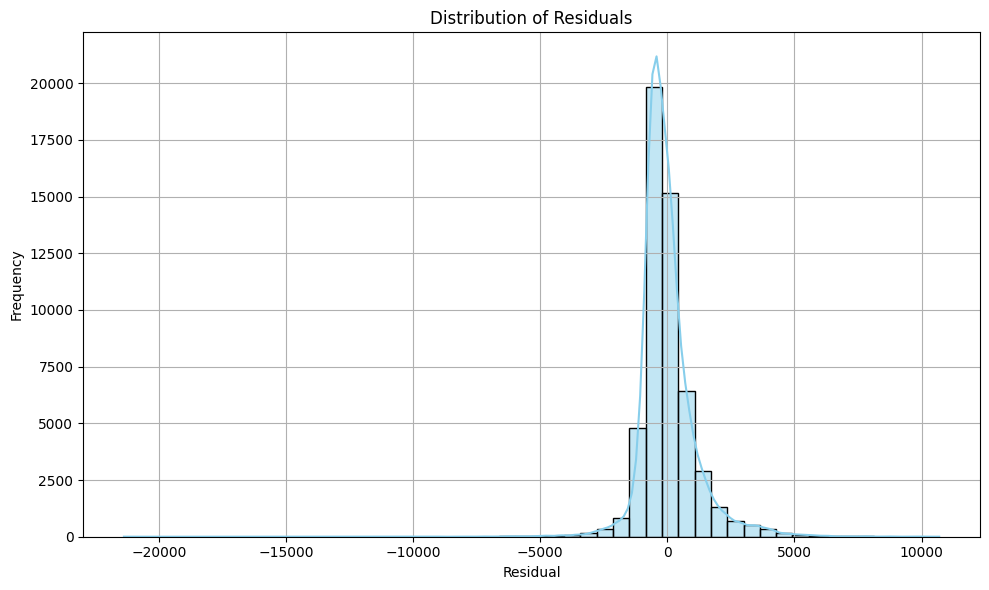

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

diamonds = sns.load_dataset('diamonds')

X = diamonds.drop(columns='price')
y = diamonds['price']

categorical_cols = X.select_dtypes(include=['category', 'object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X, y)

y_pred = model.predict(X)
residuals = y - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True, color='skyblue')
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


Q2. Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root
Mean Squared Error (RMSE) for a linear regression model

In [2]:
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

diamonds = sns.load_dataset('diamonds')

X = diamonds.drop(columns='price')
y = diamonds['price']

categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
pipeline.fit(X, y)

y_pred = pipeline.predict(X)

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")


Mean Squared Error (MSE): 1,276,545.17
Mean Absolute Error (MAE): 739.99
Root Mean Squared Error (RMSE): 1,129.84


Q3. Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check
linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.

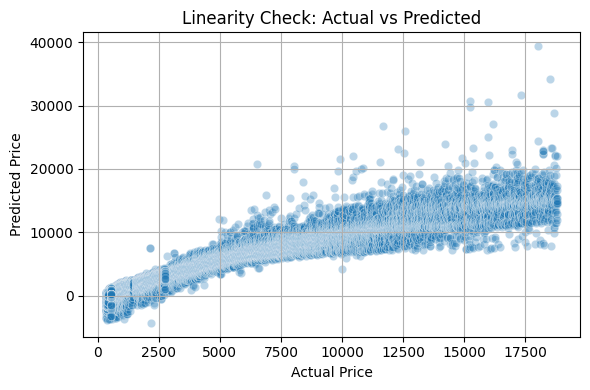

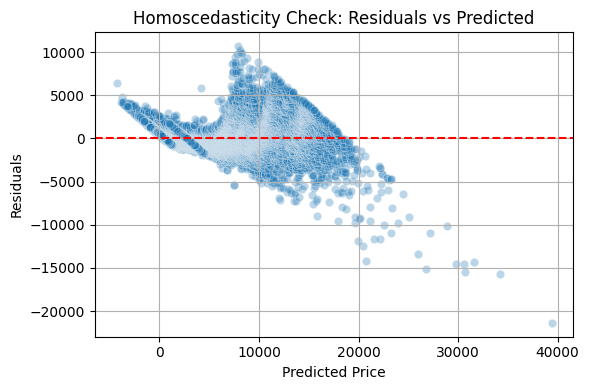

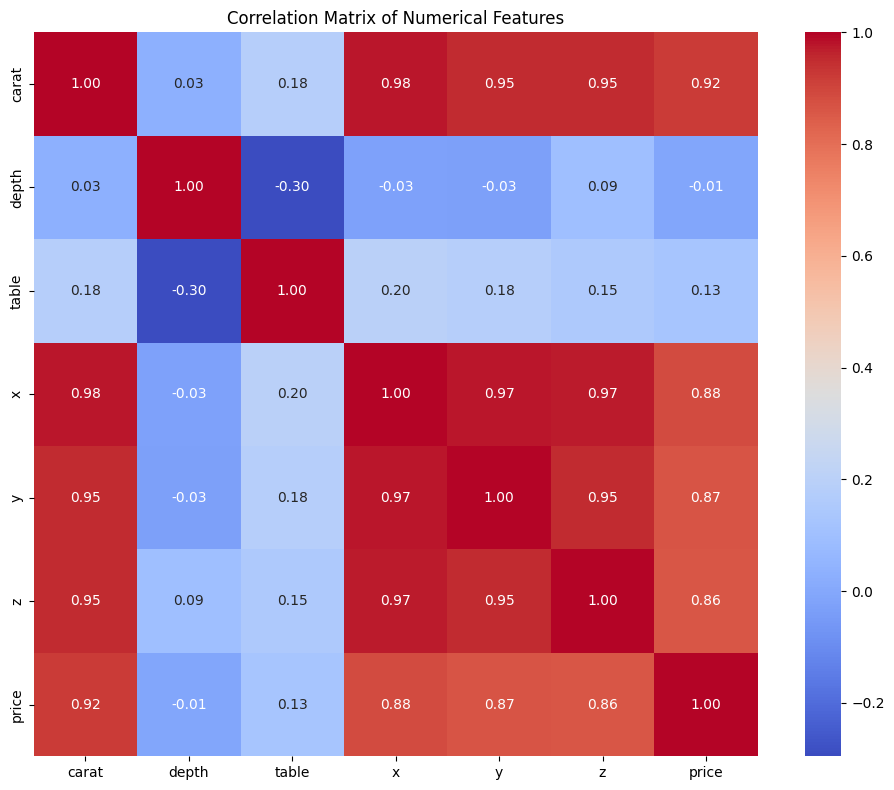

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np

diamonds = sns.load_dataset('diamonds')

X = diamonds.drop(columns='price')
y = diamonds['price']

categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline.fit(X, y)

y_pred = pipeline.predict(X)
residuals = y - y_pred

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y, y=y_pred, alpha=0.3)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linearity Check: Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check: Residuals vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
corr = diamonds[numerical_cols + ['price']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()


Q4.Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the
performance of different regression models.

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np

diamonds = sns.load_dataset('diamonds')
X = diamonds.drop('price', axis=1)
y = diamonds['price']

categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), categorical_cols),
    ('num', StandardScaler(), numerical_cols)
])

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_
results = []

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    mse = -cross_val_score(pipeline, X, y, cv=cv, scoring=mse_scorer).mean()
    r2 = cross_val_score(pipeline, X, y, cv=cv, scoring=r2_scorer).mean()

    results.append({
        'Model': name,
        'MSE': mse,
        'RMSE': np.sqrt(mse),
        'R2 Score': r2
    })

results_df = pd.DataFrame(results).sort_values(by='RMSE')
print(results_df.to_string(index=False))


Q5. Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and
R-squared score.

In [5]:
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

diamonds = sns.load_dataset('diamonds')

X = diamonds[['carat']]
y = diamonds['price']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

print(f"Coefficient (slope): {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"R-squared Score: {r2_score(y, y_pred):.4f}")


Coefficient (slope): 7756.43
Intercept: -2256.36
R-squared Score: 0.8493


Q6.Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using
simple linear regression and visualizes the results.

Coefficient (slope): 0.11
Intercept: 0.92
R-squared Score: 0.4566


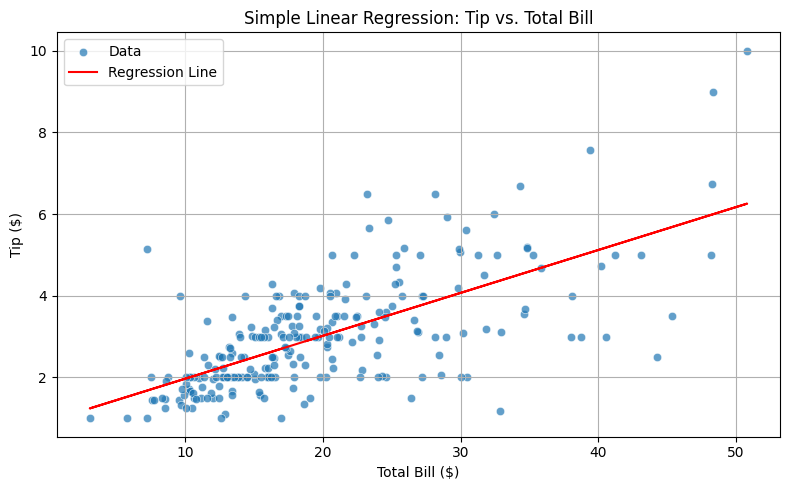

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

tips = sns.load_dataset('tips')

X = tips[['total_bill']]
y = tips['tip']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(f"Coefficient (slope): {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"R-squared Score: {r2_score(y, y_pred):.4f}")

plt.figure(figsize=(8, 5))
sns.scatterplot(x='total_bill', y='tip', data=tips, label='Data', alpha=0.7)
plt.plot(tips['total_bill'], y_pred, color='red', label='Regression Line')
plt.title('Simple Linear Regression: Tip vs. Total Bill')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Q7. Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the
model to predict new values and plot the data points along with the regression line.

Coefficient (slope): 45.79
Intercept: 1.75


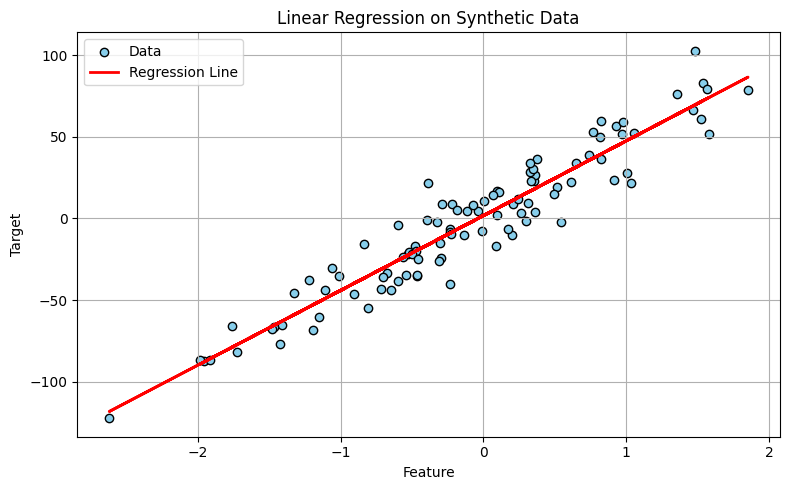

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

print(f"Coefficient (slope): {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='skyblue', edgecolor='k', label='Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression on Synthetic Data')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Q8.Write a Python script that pickles a trained linear regression model and saves it to a file.

In [ ]:
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=1)

model = LinearRegression()
model.fit(X, y)

print(f"Model trained: Coef = {model.coef_[0]:.2f}, Intercept = {model.intercept_:.2f}")

with open('linear_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model has been saved to 'linear_model.pkl'")


Q10. Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear
regression model to the data. Print the model's coefficient and intercept.

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression

np.random.seed(42)

X = 2 * np.random.rand(100, 1)

true_slope = 3.5
true_intercept = 1.2
noise = np.random.randn(100, 1)
y = true_slope * X + true_intercept + noise

model = LinearRegression()
model.fit(X, y)

print(f"Estimated Coefficient (slope): {model.coef_[0][0]:.2f}")
print(f"Estimated Intercept: {model.intercept_[0]:.2f}")


Estimated Coefficient (slope): 3.27
Estimated Intercept: 1.42


Q11. Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and
compares their performance.

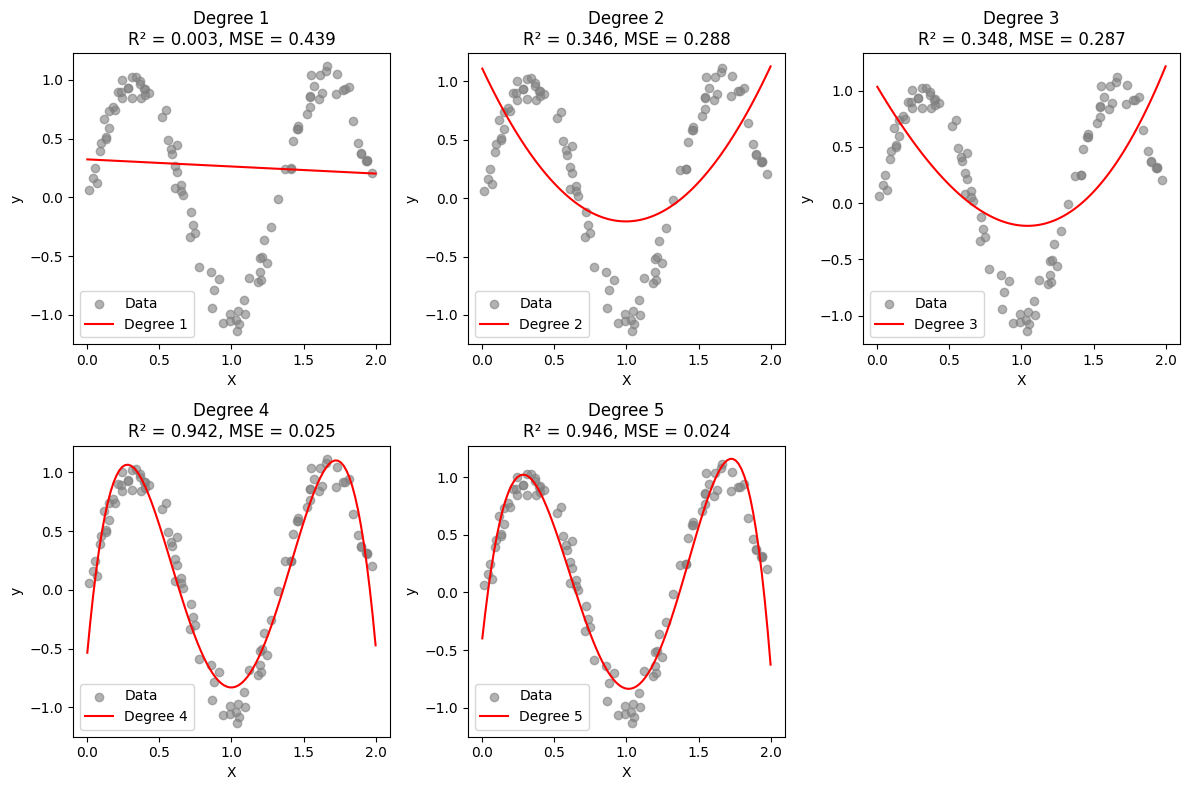


Model Performance Comparison:
Degree   MSE          R² Score
1        0.4395       0.0029
2        0.2883       0.3459
3        0.2874       0.3480
4        0.0254       0.9423
5        0.0240       0.9456


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(42)
X = np.sort(2 * np.random.rand(100, 1), axis=0)
y = np.sin(1.5 * np.pi * X).ravel() + np.random.normal(0, 0.1, X.shape[0])

degrees = [1, 2, 3, 4, 5]

X_plot = np.linspace(0, 2, 100).reshape(-1, 1)

results = []

plt.figure(figsize=(12, 8))

for i, degree in enumerate(degrees, 1):

    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    X_plot_poly = poly.transform(X_plot)

    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    y_plot = model.predict(X_plot_poly)

    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    results.
    plt.subplot(2, 3, i)
    plt.scatter(X, y, color='gray', label='Data', alpha=0.6)
    plt.plot(X_plot, y_plot, label=f'Degree {degree}', color='red')
    plt.title(f'Degree {degree}\nR² = {r2:.3f}, MSE = {mse:.3f}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

plt.tight_layout()
plt.show()

print("\nModel Performance Comparison:")
print(f"{'Degree':<8} {'MSE':<12} {'R² Score'}")
for degree, mse, r2 in results:
    print(f"{degree:<8} {mse:<12.4f} {r2:.4f}")


Q12. Write a Python script that fits a simple linear regression model with two features and prints the model's
coefficients, intercept, and R-squared score.

In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

np.random.seed(42)

X = 2 * np.random.rand(100, 2)

true_coefficients = np.array([3.5, -2.1])
true_intercept = 5.0
noise = np.random.randn(100)
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_:.2f}")
print(f"R-squared Score: {r2_score(y, y_pred):.4f}")


Model Coefficients: [ 3.66933339 -1.92252698]
Model Intercept: 4.77
R-squared Score: 0.8662


Q13. Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the
regression line along with the data points.

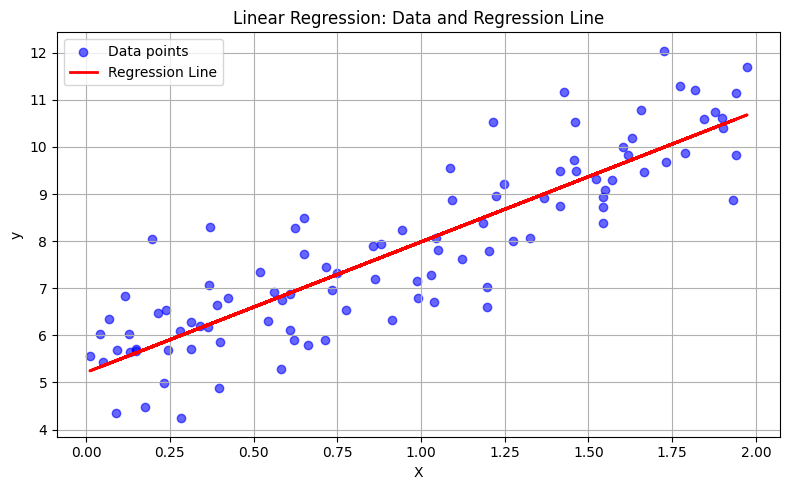

Coefficient (slope): 2.77
Intercept: 5.22


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 3 * X + 5 + np.random.randn(100, 1)

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Data points', alpha=0.6)
plt.plot(X, y_pred, color='red', label='Regression Line', linewidth=2)
plt.title('Linear Regression: Data and Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print(f"Coefficient (slope): {model.coef_[0][0]:.2f}")
print(f"Intercept: {model.intercept_[0]:.2f}")


Q14.Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset
with multiple features.

In [12]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

import seaborn as sns
diamonds = sns.load_dataset('diamonds')

X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]

X_with_const = add_constant(X)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

print(vif_data)


  Feature          VIF
0   const  4821.696350
1   carat    21.602712
2   depth     1.496590
3   table     1.143225
4       x    56.187704
5       y    20.454295
6       z    23.530049


Q15.. Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a
polynomial regression model, and plots the regression curve.




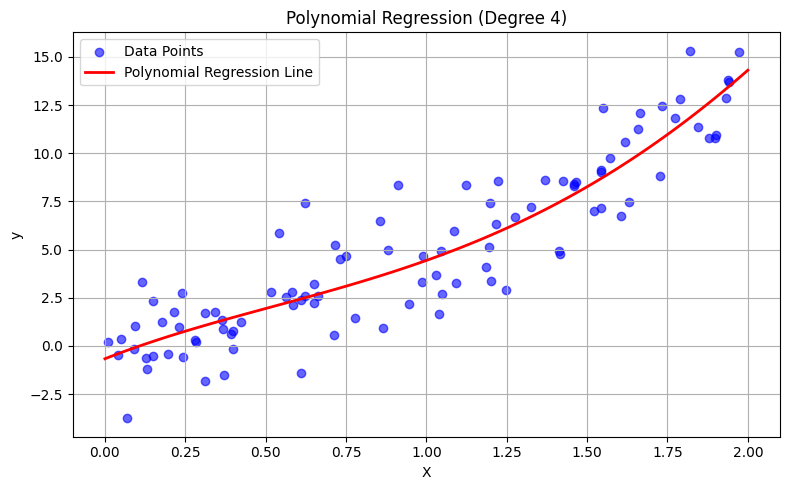

Model Intercept: -0.67
Model Coefficients: [[ 0.          6.56270441 -4.10944335  3.01284689 -0.36344521]]


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

np.random.seed(42)
X = np.sort(2 * np.random.rand(100, 1), axis=0)
y = 0.5 * X**4 - X**3 + 2 * X**2 + 3 * X + np.random.randn(100, 1) * 2
poly_features = PolynomialFeatures(degree=4)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

X_plot = np.linspace(0, 2, 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
y_plot = model.predict(X_plot_poly)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Data Points', alpha=0.6)
plt.plot(X_plot, y_plot, color='red', label='Polynomial Regression Line', linewidth=2)
plt.title('Polynomial Regression (Degree 4)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Model Intercept: {model.intercept_[0]:.2f}")
print(f"Model Coefficients: {model.coef_}")


Q16. Write a Python script that creates a machine learning pipeline with data standardization and a multiple
linear regression model, and prints the R-squared score.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score

X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2:.4f}")


Q17.Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the
regression curve.

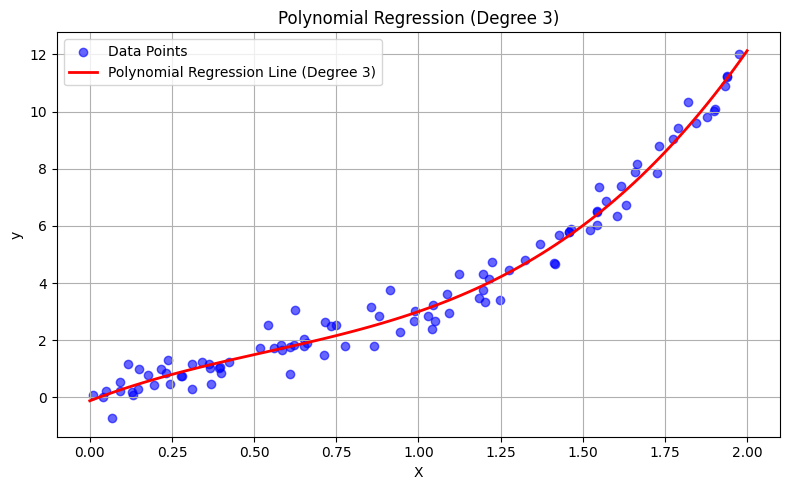

Model Intercept: -0.12
Model Coefficients: [[ 0.          4.41104066 -3.43495752  2.14565521]]


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

np.random.seed(42)
X = np.sort(2 * np.random.rand(100, 1), axis=0)
y = 2 * X**3 - 3 * X**2 + 4 * X + np.random.randn(100, 1) * 0.5
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)
X_plot = np.linspace(0, 2, 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
y_plot = model.predict(X_plot_poly)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Data Points', alpha=0.6)
plt.plot(X_plot, y_plot, color='red', label='Polynomial Regression Line (Degree 3)', linewidth=2)
plt.title('Polynomial Regression (Degree 3)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Model Intercept: {model.intercept_[0]:.2f}")
print(f"Model Coefficients: {model.coef_}")


Q18. Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print
the R-squared score and model coefficients.

In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

np.random.seed(42)
X = np.random.rand(100, 5)
y = 3 * X[:, 0] + 2 * X[:, 1] - X[:, 2] + 0.5 * X[:, 3] - 2 * X[:, 4] + np.random.randn(100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2:.4f}")
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_:.2f}")


R-squared Score: 0.4307
Model Coefficients: [ 2.65295867  1.76607667 -0.35209671  0.6455846  -2.44564017]
Model Intercept: 0.15


Q19. Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the
data points along with the regression line.

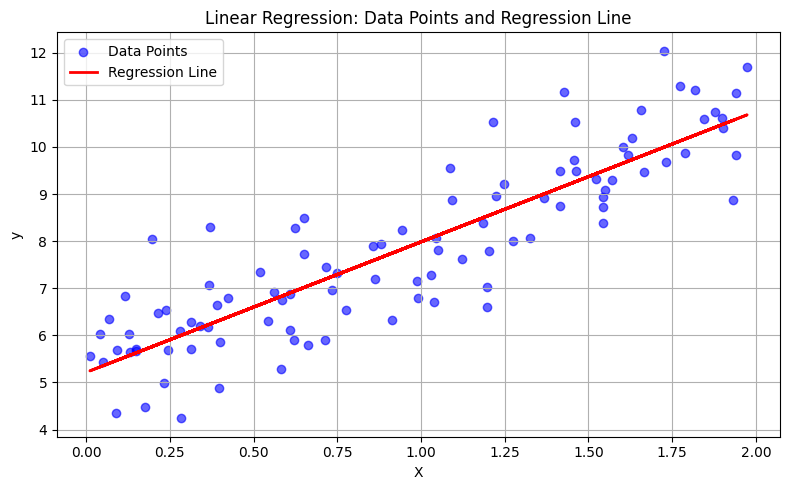

Model Coefficient (Slope): 2.77
Model Intercept: 5.22


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 3 * X + 5 + np.random.randn(100, 1)

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Data Points', alpha=0.6)
plt.plot(X, y_pred, color='red', label='Regression Line', linewidth=2)
plt.title('Linear Regression: Data Points and Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Model Coefficient (Slope): {model.coef_[0][0]:.2f}")
print(f"Model Intercept: {model.intercept_[0]:.2f}")


Q20. Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's Rsquared score and coefficients.

In [17]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

np.random.seed(42)
X = np.random.rand(100, 3)
y = 2 * X[:, 0] + 3 * X[:, 1] - 1 * X[:, 2] + 5 + np.random.randn(100)
s
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f"R-squared Score: {r2:.4f}")
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_:.2f}")


R-squared Score: 0.2862
Model Coefficients: [ 2.10589767  2.92460599 -0.31394075]
Model Intercept: 4.91


Q21.Write a Python script that demonstrates how to serialize and deserialize machine learning models using
joblib instead of pickling.

In [18]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import joblib

np.random.seed(42)
X = np.random.rand(100, 3)
y = 2 * X[:, 0] + 3 * X[:, 1] - 1 * X[:, 2] + 5 + np.random.randn(100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

joblib.dump(model, 'linear_regression_model.joblib')

loaded_model = joblib.load('linear_regression_model.joblib')

y_pred = loaded_model.predict(X_test)

from sklearn.metrics import r2_score
print(f"R-squared Score: {r2_score(y_test, y_pred):.4f}")
print(f"Model Coefficients: {loaded_model.coef_}")
print(f"Model Intercept: {loaded_model.intercept_:.2f}")


R-squared Score: 0.2862
Model Coefficients: [ 2.10589767  2.92460599 -0.31394075]
Model Intercept: 4.91


Q22. Write a Python script to perform linear regression with categorical features using one-hot encoding. Use
the Seaborn 'tips' dataset.

In [19]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

tips = sns.load_dataset('tips')

print(tips.head())

X = tips[['total_bill', 'sex', 'smoker', 'day', 'time', 'size']]
y = tips['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
h
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), ['sex', 'smoker', 'day', 'time'])
    ],
    remainder='passthrough'
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2:.4f}")

print("Model Coefficients:")
print(model.named_steps['regressor'].coef_)

print(f"Model Intercept: {model.named_steps['regressor'].intercept_:.2f}")


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
R-squared Score: 0.4373
Model Coefficients:
[ 0.02881928 -0.19235325 -0.1857853  -0.05079339 -0.17972098  0.09495716
  0.09469974  0.23348393]
Model Intercept: 0.73


Q23.Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and Rsquared score.

Linear Regression:
R-squared Score: 0.2862
Coefficients: [ 2.10589767  2.92460599 -0.31394075]
Intercept: 4.91

Ridge Regression:
R-squared Score: 0.2794
Coefficients: [ 1.83268264  2.59794356 -0.3171896 ]
Intercept: 5.21


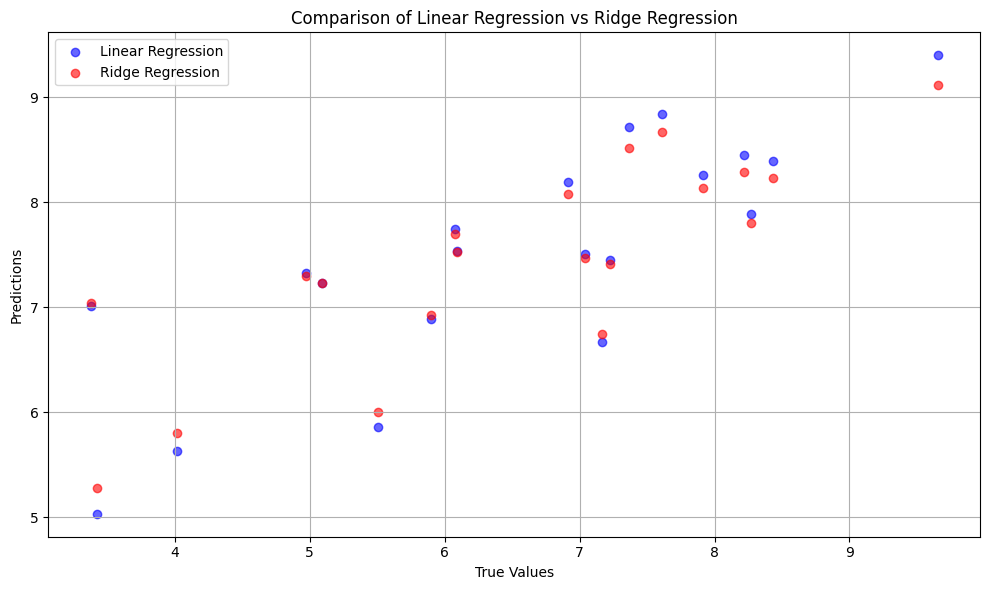

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

np.random.seed(42)
X = np.random.rand(100, 3)
y = 2 * X[:, 0] + 3 * X[:, 1] - 1 * X[:, 2] + 5 + np.random.randn(100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
ridge_model = Ridge(
lr_model.fit(X_train, y_train)
ridge_model.fit(
lr_pred = lr_model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)

lr_r2 = r2_score(y_test, lr_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
print("Linear Regression:")
print(f"R-squared Score: {lr_r2:.4f}")
print(f"Coefficients: {lr_model.coef_}")
print(f"Intercept: {lr_model.intercept_:.2f}\n")

print("Ridge Regression:")
print(f"R-squared Score: {ridge_r2:.4f}")
print(f"Coefficients: {ridge_model.coef_}")
print(f"Intercept: {ridge_model.intercept_:.2f}")

plt.figure(figsize=(10, 6))

plt.scatter(y_test, lr_pred, color='blue', label='Linear Regression', alpha=0.6)

plt.scatter(y_test, ridge_pred, color='red', label='Ridge Regression', alpha=0.6)

plt.title('Comparison of Linear Regression vs Ridge Regression')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Q24. Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic
dataset.

In [21]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression

np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=3, noise=0.1)

model = LinearRegression()

cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("Cross-Validation R-squared Scores for Each Fold:")
print(cv_scores)

print(f"\nMean R-squared Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation of R-squared Scores: {cv_scores.std():.4f}")


Cross-Validation R-squared Scores for Each Fold:
[0.99999808 0.99999849 0.99999893 0.99999836 0.99999788]

Mean R-squared Score: 1.0000
Standard Deviation of R-squared Scores: 0.0000


Q25. Write a Python script that compares polynomial regression models of different degrees and prints the Rsquared score for each.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_scorer
np.random.seed(42)
X = np.random.rand(100, 1)
y = 2 * X[:, 0] ** 3 + 3 * X[:, 0] ** 2 - 5 * X[:, 0] + 7 + np.random.randn(100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def evaluate_polynomial_regression(degrees):
    for degree in degrees:

        poly = PolynomialFeatures(degree=degree)
        X_poly_train = poly.fit_transform(X_train)
        X_poly_test = poly.transform(X_test)

        model = LinearRegression()
        model.fit(X_poly_train, y_train)

        y_pred = model.predict(X_poly_test)
        r2 = r2_score(y_test, y_pred)

        print(f"Degree {degree} Polynomial Regression - R-squared: {r2:.4f}")

        plt.figure(figsize=(10, 6))
        plt.scatter(X, y, color='blue', label='Data')
        X_range = np.linspace(0, 1, 1000).reshape(-1, 1)
        X_range_poly = poly.transform(X_range)
        y_range = model.predict(X_range_poly)
        plt.plot(X_range, y_range, label=f"Degree {degree} Model", color='red')
        plt.title(f"Polynomial Regression (Degree {degree})")
        plt.xlabel('X')
        plt.ylabel('y')
        plt.legend()
        plt.grid(True)
        plt.show()

degrees = [1, 2, 3, 4, 5]

evaluate_polynomial_regression(degrees)
